<a href="https://colab.research.google.com/github/mohamedfadul/DeepSearch-Finding-Truncated-Differential-Trails-Using-Genetic-Algorithms-and-Deep-Learning/blob/main/Val_Model_RF_US_DThresh_P1_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-11-01 08:42:05--  https://drive.google.com/uc?export=download&id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz
Resolving drive.google.com (drive.google.com)... 108.177.121.138, 108.177.121.101, 108.177.121.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.121.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz&export=download [following]
--2024-11-01 08:42:05--  https://drive.usercontent.google.com/download?id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.183.132, 2607:f8b0:4001:c64::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.183.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2547566 (2.4M) [application/octet-stream]
Saving to: ‘all_dataset_path.csv’

all_dataset_path.cs 100%[===================>]   2.4

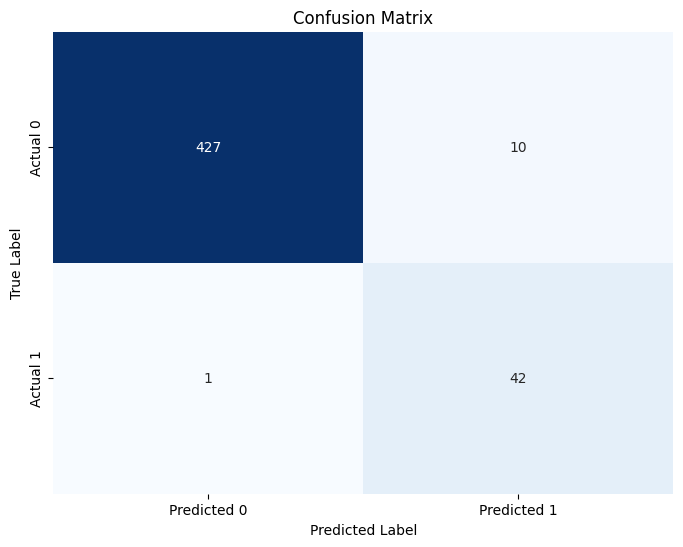

True Negatives (Class 0 predicted correctly): 427
False Positives (Class 0 incorrectly predicted as Class 1): 10
False Negatives (Class 1 incorrectly predicted as Class 0): 1
True Positives (Class 1 predicted correctly): 42


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original dataset
!wget -O all_dataset_path.csv "https://drive.google.com/uc?export=download&id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz"

all_dataset = pd.read_csv ('all_dataset_path.csv')

# Normalize the 'sboxes' and 'round' features
all_dataset['sboxes'] = all_dataset['sboxes'] / (all_dataset['round'] * 8)
all_dataset['round'] = all_dataset['round'] / 100

# Split into training and testing datasets
dataset = all_dataset.sample(frac=0.96, random_state=0)
test_dataset = all_dataset.drop(dataset.index)

# Class count for undersampling
count_class_0, count_class_1 = dataset.validity.value_counts()

# Divide by class
df_class_0 = dataset[dataset['validity'] == 0]
df_class_1 = dataset[dataset['validity'] == 1]

# Undersample majority class (0) to balance the dataset
df_class_0_under = df_class_0.sample(count_class_1)
train_dataset = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(train_dataset.validity.value_counts())

# Separate features and labels
X_train = train_dataset.drop("validity", axis=1)
y_train = train_dataset["validity"]
X_test = test_dataset.drop("validity", axis=1)
y_test = test_dataset["validity"]

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_preds = rf_model.predict(X_test)
y_preds = (y_preds > 0.5).astype(int)  # Binarize predictions

# Display classification report
print("Classification Report: \n", classification_report(y_test, y_preds))

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print details for each class
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (Class 0 predicted correctly): {tn}")
print(f"False Positives (Class 0 incorrectly predicted as Class 1): {fp}")
print(f"False Negatives (Class 1 incorrectly predicted as Class 0): {fn}")
print(f"True Positives (Class 1 predicted correctly): {tp}")